## Text Classification

**Text classification** or **Text Categorization** is the activity of labeling natural language texts with relevant categories from a predefined set. In laymen terms, text classification is a process of extracting generic tags from unstructured text. These generic tags come from a set of pre-defined categories. Classifying your content and products into categories help users to easily search and navigate within website or application.

In any business, understanding the customer is the basic necessity to succeed. The user views, queries and sentiments plays a major role is delivering the users’ point of view. Everyone now is trying to collect those embedded users’ views about the products or services using the emerging technology called “Natural Language Processing”.

### Use cases

- Emails (spam/not spam; important/work/personal; etc) [personal]
- Emails (product/service/refund/complain; trending topics; ) [company]
- News (Business/Technology/Sports/National/International) [inshorts, medium]
- Research Paper repositories.
- Facebook post's and Tweet's (trending topics)
- Review classification amazon and IMDB.
- Website classification for SEO.

In [1]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('Datasets/question_topic.csv', index_col=0)
df.head()

,question_text,question_topic
0,"Hi! If I sign up for your email list, can I se...",Sales/Promotions
1,I'm going to be out of the country for about a...,Shipping
2,I was wondering if you'd be able to overnight ...,Shipping
3,The Swingline electronic stapler (472555) look...,Shipping
4,I think this cosmetic bag would work great for...,Shipping


In [18]:
df['question_topic'].value_counts()

Product Specifications    839
Product Availability      833
Product Comparison        806
Shipping                  799
Returns & Refunds         768
Sales/Promotions          505
Omnichannel               450
Name: question_topic, dtype: int64

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

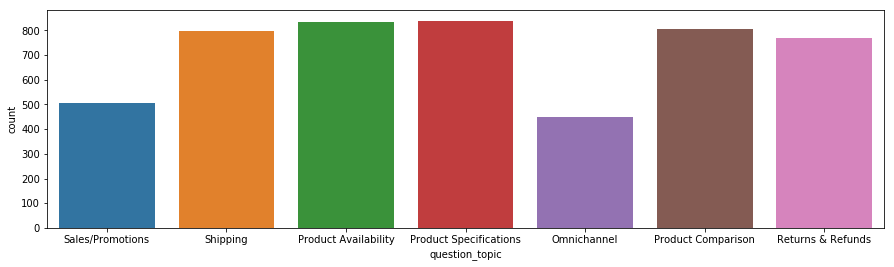

In [20]:
plt.figure(figsize=(15,4))
sns.countplot(x = df['question_topic'])

In [21]:
import re

def clean_data(string):
    string = re.sub(r"\n", "", string)    
    string = re.sub(r"\r", "", string) 
    string = re.sub(r"[0-9]", "digit", string)
    string = re.sub(r"\'", "", string)    
    string = re.sub(r"\"", "", string)    
    return string.strip().lower()

df['question_text'] = df['question_text'].apply(clean_data)

In [22]:
df.head()

,question_text,question_topic
0,"hi! if i sign up for your email list, can i se...",Sales/Promotions
1,im going to be out of the country for about a ...,Shipping
2,i was wondering if youd be able to overnight a...,Shipping
3,the swingline electronic stapler (digitdigitdi...,Shipping
4,i think this cosmetic bag would work great for...,Shipping


In [71]:
from sklearn.model_selection import train_test_split

X = df['question_text']
y = df['question_topic']
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=3)
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [51]:
from sklearn.naive_bayes import GaussianNB

In [74]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [75]:
print(f'Trainning Accuracy:{model.score(X_train,y_train)}')

Trainning Accuracy:0.99825


In [77]:
print(f'Test Accuracy:{model.score(X_test, y_test)}')

Test Accuracy:0.948


In [90]:
sample1 = 'Do you have any offers going on now!'
sample2 = 'I have received my refund'
sample3 = 'any updates regarding my product delivery date?'
sample4 = 'can you help me to decide which product to buy?'

In [91]:
sample = vectorizer.transform([x.lower() for x in [sample1, sample2, sample3, sample4]]).toarray()
list(model.predict(sample))

['Sales/Promotions', 'Returns & Refunds', 'Shipping', 'Product Comparison']